In [1]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
import csv
import itertools
import collections

import pywt
from scipy import stats

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax,MaxPool1D,MaxPooling1D
from keras.optimizers import Adam 
from keras.utils import to_categorical
from keras.utils import plot_model
from keras import regularizers


In [3]:
from tensorflow.keras.models import load_model

In [4]:
model=load_model('csv_model')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2000, 16)          224       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 999, 16)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 999, 32)           7712      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 499, 32)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 499, 64)           34880     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 249, 64)          0

In [20]:
window_size = 1000
maximum_counting = 10000

In [46]:
record_file = "mitbih_database/100.csv"
annotation_file = "mitbih_database/100annotations.txt"

In [56]:
import csv

signals = []

with open(record_file, 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')  

    header = next(spamreader, None)

    for row_index, row in enumerate(spamreader):
            signals.append(int(row[1]))


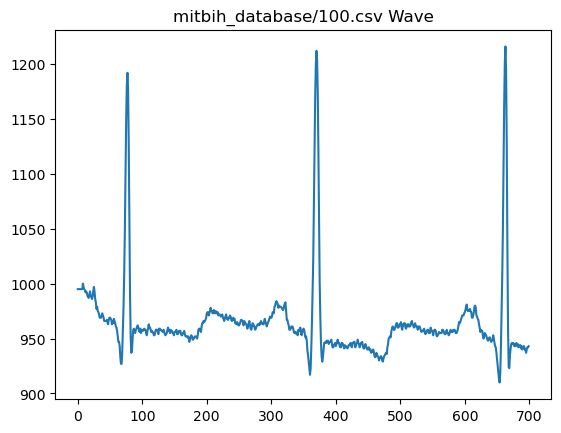

In [58]:
plt.title(record_file + " Wave")
plt.plot(signals[0:700])
plt.show()

In [59]:
signals = stats.zscore(signals)

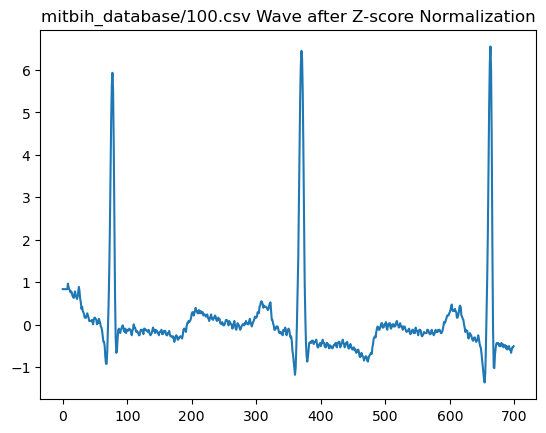

In [60]:
plt.title(record_file + " Wave after Z-score Normalization")
plt.plot(signals[0:700])
plt.show()

In [61]:
X = list()

In [62]:
with open(annotation_file, 'r') as fileID:
    data = fileID.readlines()
    beat = list()

    for d in range(1, len(data)): 
        splitted = data[d].split(' ')
        splitted = filter(None, splitted)
        next(splitted) 
        pos = int(next(splitted)) 

        if window_size <= pos and pos < (len(signals) - window_size):
            beat = signals[pos - window_size:pos + window_size] 

            X.append(beat)

In [63]:
np.shape(X)

(2265, 2000)

In [64]:
df = pd.DataFrame(X)

In [65]:
df

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.136123,0.136123,0.110243,0.162003,0.162003,0.213763,0.187883,0.110243,0.084363,0.136123,...,-0.174436,-0.200316,-0.252076,-0.329716,-0.226196,-0.226196,-0.226196,-0.200316,-0.226196,-0.252076
1,-0.045036,-0.019156,0.058483,0.084363,0.006723,-0.019156,-0.070916,-0.045036,0.032603,-0.045036,...,-0.976716,-1.080236,-1.002596,-0.924956,-0.950836,-0.924956,-1.002596,-1.002596,-0.950836,-0.899076
2,-0.226196,-0.174436,-0.148556,-0.122676,-0.148556,-0.174436,-0.277956,-0.226196,-0.226196,-0.252076,...,-0.562636,-0.614396,-0.614396,-0.588516,-0.536756,-0.536756,-0.588516,-0.640276,-0.614396,-0.588516
3,-0.407356,-0.329716,-0.303836,-0.329716,-0.355596,-0.226196,-0.148556,-0.070916,-0.045036,-0.070916,...,-0.433236,-0.459116,-0.381476,-0.355596,-0.381476,-0.407356,-0.484996,-0.407356,-0.381476,-0.355596
4,-0.174436,-0.122676,-0.070916,-0.045036,-0.096796,-0.148556,-0.252076,-0.200316,-0.174436,-0.148556,...,0.084363,0.084363,0.032603,0.136123,0.162003,0.239643,0.239643,0.187883,0.213763,0.265523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,-0.666156,-0.614396,-0.614396,-0.640276,-0.666156,-0.769676,-0.717916,-0.666156,-0.666156,-0.743796,...,0.627843,0.627843,0.731363,0.783123,0.731363,0.834883,0.834883,0.834883,0.757243,0.653723
2261,-0.614396,-0.562636,-0.510876,-0.484996,-0.562636,-0.562636,-0.536756,-0.484996,-0.459116,-0.459116,...,-0.019156,-0.122676,-0.148556,-0.070916,-0.019156,-0.045036,-0.122676,-0.174436,-0.200316,-0.148556
2262,0.084363,0.058483,0.058483,0.110243,0.187883,0.136123,0.187883,0.136123,0.136123,0.110243,...,-0.226196,-0.252076,-0.329716,-0.536756,-0.743796,-0.950836,-1.028476,-1.209635,-1.494315,-1.339035
2263,-0.329716,-0.329716,-0.329716,-0.355596,-0.329716,-0.303836,-0.277956,-0.252076,-0.252076,-0.303836,...,-1.364915,-1.494315,-1.597835,-1.390795,-0.873196,-0.226196,0.601963,1.921842,3.526401,4.949799


In [68]:
pred = model.predict(df)

71/71 [==============================] - 4s 57ms/step


In [67]:
classes = ['N', 'L', 'R', 'A', 'V']
n_classes = len(classes)

In [69]:
pred.argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
classes[np.argmax(pred)]

'N'

In [73]:
model=load_model('csv_model')

record_file = "mitbih_database/100.csv"
annotation_file = "mitbih_database/100annotations.txt"

import csv


signals = []

with open(record_file, 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')  

    header = next(spamreader, None)

    for row_index, row in enumerate(spamreader):
            signals.append(int(row[1]))
            

signals = stats.zscore(signals)

X = list()

with open(annotation_file, 'r') as fileID:
    data = fileID.readlines()
    beat = list()

    for d in range(1, len(data)): 
        splitted = data[d].split(' ')
        splitted = filter(None, splitted)
        next(splitted) 
        pos = int(next(splitted))  
        
        if window_size <= pos and pos < (len(signals) - window_size):
            beat = signals[pos - window_size:pos + window_size]
            X.append(beat)

df = pd.DataFrame(X)
pred = model.predict(df)
classes = ['N', 'L', 'R', 'A', 'V']
print(classes[np.argmax(pred)])

71/71 [==============================] - 4s 56ms/step
N
